<a href="https://colab.research.google.com/github/tom2rd/Googlecolabutils/blob/master/Matplot_pyplot_JP_example0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
# Matplotlib pyplot tutorial 日本語
* API
 * https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html
* Tutorial
 * https://matplotlib.org/tutorials/index.html

---


# 日本語化

```
!pip install japanize_matplotlib

import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns #フォントの設定のためseabornを使う

sns.set(font="IPAexGothic") #日本語フォント設定
```



In [0]:
!pip install japanize_matplotlib

In [0]:
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns

sns.set(font="IPAexGothic") #日本語フォント設定

Text(0.5, 1.0, '折れ線グラフ')

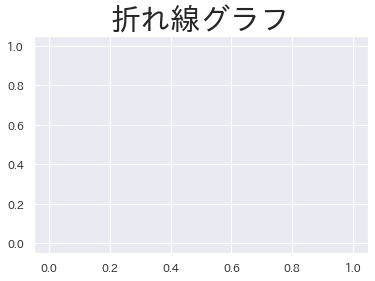

In [3]:
ax = plt.plot(figsize=(10,5))
plt.title('折れ線グラフ', fontsize=30)

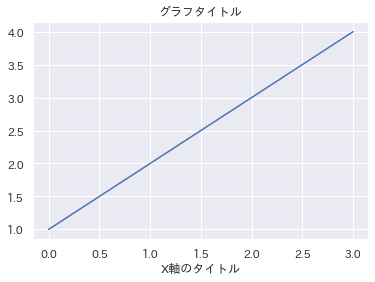

In [5]:
plt.plot([1, 2, 3, 4])
plt.xlabel('X軸のタイトル')
plt.title('グラフタイトル')
plt.show()



---



---



---

